# Proof of concept
Tutorial on tensorflow https://pythoncursus.nl/image-recognition-python/#wat-is-tensorflow 

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt


## Data cleaning
Import data

In [3]:
dataset_fashion = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = dataset_fashion.load_data()

print("Train images:", len(train_images))
print("Test images:", len(test_images))

Train images: 60000
Test images: 10000


In [22]:
print(train_images[1].shape)
train_images[1]

(28, 28)


array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

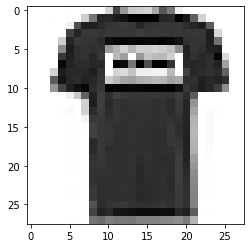

In [5]:
plt.imshow(train_images[1], cmap=plt.cm.binary)

In [6]:
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
label_names[train_labels[1]]

'T-shirt/top'

### Color to monochrome
Normaliseren van de kleur images(0-255) naar zwart wit(0-1):

In [7]:
train_images = train_images / 255
test_images = test_images / 255

print(np.min(train_images))
print(np.max(train_images))

0.0
1.0


In [8]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

## Model
### Flatten
 De eerste laag die we aanmaken heeft type Flatten met een input_shape=(28,28). Dit is de input layer en door type Flatten zorgen we ervoor dat een afbeelding die uit 28 rijen van 28 waarden om wordt gezet in één lijst van 28*28 = 784 waarden.
 
 relu” staat voor rectified linear unit.

In [9]:
model = keras.Sequential()

model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### Train model

In [11]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(x=train_images, y=train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 667us/step - loss: 0.4918 - accuracy: 0.8277
Epoch 2/5
1875/1875 [==============================] - 1s 666us/step - loss: 0.3701 - accuracy: 0.8669
Epoch 3/5
1875/1875 [==============================] - 1s 646us/step - loss: 0.3360 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 1s 645us/step - loss: 0.3119 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 1s 648us/step - loss: 0.2929 - accuracy: 0.8916


In [13]:
model.save("model.h5")

In [14]:
saved_model = keras.models.load_model("model.h5")
saved_model

# Testing/predicting

In [15]:
predictions = saved_model.predict(test_images)
predictions[10]

array([5.67005964e-06, 1.04723094e-05, 1.49945050e-01, 2.06529648e-06,
       8.23930979e-01, 1.18524746e-07, 2.61043794e-02, 1.68642238e-08,
       9.98883593e-07, 1.59968806e-07], dtype=float32)

In [16]:
np.argmax(predictions[10])

4

In [17]:
i = train_images[1].copy()
i.dtype

dtype('float64')